(50000, 14)
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                  

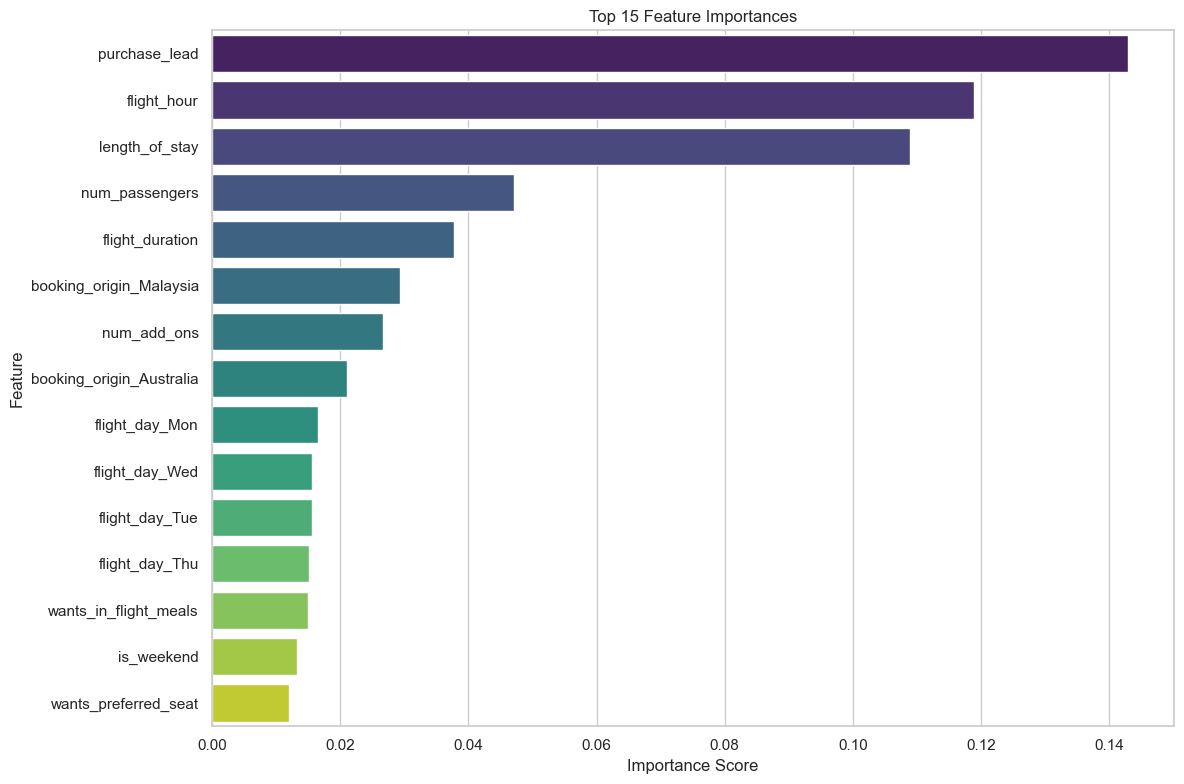

In [3]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📊 Set style
sns.set(style="whitegrid")

# 🧹 Optional: Display all columns
pd.set_option('display.max_columns', None)

# 📥 2. Load Dataset
df = pd.read_csv(r"C:\Users\ragha\Desktop\certifications\British Airways\task 2\customer_booking.csv", encoding='windows-1252')
 

# 👀 3. Explore the Data
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df['booking_complete'].value_counts())

# 🔍 4. Check for Missing Values
print(df.isnull().sum())

# 🧠 5. Feature Engineering

# Weekend or not
df['is_weekend'] = df['flight_day'].isin(['Sat', 'Sun']).astype(int)

# Number of additional services selected
df['num_add_ons'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum(axis=1)

# One-hot encoding for categorical variables
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🏁 6. Split into Features and Target
X = df.drop(columns='booking_complete')
y = df['booking_complete']

# 📤 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 8. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 9. Predictions
y_pred = model.predict(X_test)

# 📈 10. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔁 11. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# ⭐ 12. Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
